# Steps Followed in building the ML Model:
### 1. Importing Libraries
### 2. Data Pre-Processing
### 3. Data Visualization
### 4. Encoding Values in Dataset
### 5. Splitting dataset into training and testing dataset
### 6. Model Training 
### 7. Model Evaluation and Prediction

# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

# 2. Data Pre-Processing

In [2]:
#Loading Dataset into Notebook
dataset = pd.read_csv("D:\Download\mero wala data set xa yesma codsoft\CODSOFT-main\MOVIE RATING PREDICTION\IMDb Movies India.csv", encoding = "latin-1")

### Displaying First 5 rows and Last 5 rows of dataset

In [3]:
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
dataset.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
dataset.shape

(15509, 10)

The dataset has 15509 rows and 10 columns

In [7]:
#Check the number of missing values in each columns
dataset.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

### Analyzing unique values in each column

In [8]:
#Number of unique values in year columns
dataset['Year'].nunique()

102

In [9]:
dataset['Year'].unique()

array([nan, '(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)',
       '(2012)', '(2014)', '(2004)', '(2016)', '(1991)', '(1990)',
       '(2018)', '(1987)', '(1948)', '(1958)', '(2017)', '(2020)',
       '(2009)', '(2002)', '(1993)', '(1946)', '(1994)', '(2007)',
       '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)',
       '(1974)', '(2015)', '(2006)', '(1981)', '(1985)', '(2011)',
       '(2001)', '(1967)', '(1988)', '(1995)', '(1959)', '(1996)',
       '(1970)', '(1976)', '(2000)', '(1999)', '(1973)', '(1968)',
       '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)',
       '(1977)', '(1957)', '(1950)', '(1992)', '(1969)', '(1975)',
       '(1947)', '(1972)', '(1971)', '(1935)', '(1978)', '(1960)',
       '(1944)', '(1963)', '(1940)', '(1984)', '(1934)', '(1955)',
       '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)',
       '(1952)', '(1933)', '(1942)', '(1939)', '(1954)', '(1945)',
       '(1961)', '(1965)', '(1938)', '(1941)', '(1931)', 

In [10]:
#Duration column:
#Number of Unique Values
print(f"Number of unique values in Duration: {dataset['Duration'].nunique()}")
print(f"Unique values in Duration: {dataset['Duration'].unique()}")

Number of unique values in Duration: 182
Unique values in Duration: [nan '109 min' '90 min' '110 min' '105 min' '147 min' '142 min' '59 min'
 '82 min' '116 min' '96 min' '120 min' '161 min' '166 min' '102 min'
 '87 min' '132 min' '66 min' '146 min' '112 min' '168 min' '158 min'
 '126 min' '94 min' '138 min' '124 min' '144 min' '157 min' '136 min'
 '107 min' '113 min' '80 min' '122 min' '149 min' '148 min' '130 min'
 '121 min' '188 min' '115 min' '103 min' '114 min' '170 min' '100 min'
 '99 min' '140 min' '128 min' '93 min' '125 min' '145 min' '75 min'
 '111 min' '134 min' '85 min' '104 min' '92 min' '137 min' '127 min'
 '150 min' '119 min' '135 min' '86 min' '76 min' '70 min' '72 min'
 '151 min' '95 min' '52 min' '89 min' '143 min' '177 min' '117 min'
 '123 min' '154 min' '88 min' '175 min' '153 min' '78 min' '139 min'
 '133 min' '101 min' '180 min' '60 min' '46 min' '164 min' '162 min'
 '171 min' '160 min' '152 min' '62 min' '163 min' '165 min' '141 min'
 '210 min' '129 min' '156 min'

In [11]:
dataset['Genre'].unique()

array(['Drama', 'Drama, Musical', 'Comedy, Romance',
       'Comedy, Drama, Musical', 'Drama, Romance, War', 'Documentary',
       'Horror, Mystery, Thriller', 'Action, Crime, Thriller', 'Horror',
       'Horror, Romance, Thriller', 'Comedy, Drama, Romance', 'Thriller',
       'Comedy, Drama', nan, 'Comedy, Drama, Fantasy',
       'Comedy, Drama, Family', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Biography', 'Comedy, Horror', 'Action',
       'Drama, Horror, Mystery', 'Comedy', 'Action, Thriller',
       'Drama, History', 'Drama, History, Sport',
       'Horror, Mystery, Romance', 'Horror, Mystery',
       'Drama, Horror, Romance', 'Action, Drama, History',
       'Action, Drama, War', 'Comedy, Family',
       'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'War', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Drama, Romance', 'Adventure, Drama', 'Comedy, Mystery, Thriller',
       'Action, Crime, Dr

In [12]:
dataset['Genre'].mode()

0    Drama
Name: Genre, dtype: object

In [13]:
dataset['Votes'].value_counts()

Votes
8        227
7        224
9        221
6        213
10       175
        ... 
1,754      1
1,208      1
1,148      1
1,277      1
1,496      1
Name: count, Length: 2034, dtype: int64

In [14]:
dataset['Votes'].nunique()

2034

In [15]:
dataset['Rating'].value_counts()

Rating
6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: count, Length: 84, dtype: int64

In [16]:
#Finding Number of duplicates
dataset.duplicated().sum()

6

There are 6 duplicate entries present in the dataset. We drop the duplicate entries 

In [17]:
dataset.drop_duplicates(inplace=True)
dataset.shape

(15503, 10)

The dataset now contains 15503 rows without the duplicate entries

In [18]:
#Statistical data of the dataset
dataset.describe() 

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [19]:
dataset.isnull().sum()

Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64

In [20]:
#Dropping columns Actor 2 and Actor 3 
dataset.drop(columns=['Actor 2' , 'Actor 3','Genre'], axis=1, inplace=True, errors = "ignore")

In [21]:
#Drops rows where Duration is missing
dataset.dropna(subset=['Duration'], inplace = True)

In [22]:
dataset.shape

(7239, 7)

The dataset now contains 7239 rows, we have dropped the rows where duration is missing i.e we have dropped 8264 rows

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7239 entries, 1 to 15508
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7239 non-null   object 
 1   Year      7114 non-null   object 
 2   Duration  7239 non-null   object 
 3   Rating    5851 non-null   float64
 4   Votes     5851 non-null   object 
 5   Director  7225 non-null   object 
 6   Actor 1   6975 non-null   object 
dtypes: float64(1), object(6)
memory usage: 452.4+ KB


In [24]:
dataset.isnull().sum()

Name           0
Year         125
Duration       0
Rating      1388
Votes       1388
Director      14
Actor 1      264
dtype: int64

In [25]:
#We drop the rows have null values in votes and ratings

dataset.dropna(subset=['Rating', 'Votes'], inplace=True)

#Number of rows in dataset after dropping rows with null values in votes and rating

dataset.shape

(5851, 7)

### Converting Year and Duration to minutes
We first convert year and duration to strings and replace '()' and min
Then we convert the resultant str to int

In [26]:
dataset['Year']= dataset['Year'].str.replace(r'[()]','', regex=True)
dataset['Duration']= dataset['Duration'].str.replace(r'min','', regex=True)
dataset.isnull().sum()

Name         0
Year         0
Duration     0
Rating       0
Votes        0
Director     1
Actor 1     75
dtype: int64

In [27]:
dataset['Year']=dataset['Year'].astype(int)
dataset['Duration']=dataset['Duration'].astype(int)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5851 entries, 1 to 15508
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int32  
 2   Duration  5851 non-null   int32  
 3   Rating    5851 non-null   float64
 4   Votes     5851 non-null   object 
 5   Director  5850 non-null   object 
 6   Actor 1   5776 non-null   object 
dtypes: float64(1), int32(2), object(4)
memory usage: 320.0+ KB


In [28]:
dataset['Votes']
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5851 entries, 1 to 15508
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int32  
 2   Duration  5851 non-null   int32  
 3   Rating    5851 non-null   float64
 4   Votes     5851 non-null   object 
 5   Director  5850 non-null   object 
 6   Actor 1   5776 non-null   object 
dtypes: float64(1), int32(2), object(4)
memory usage: 320.0+ KB


It can be observed that for votes >=1000, there is a ',' in the number, therefore it cannot be converted directly into int. 
For this, we first replace the ',' with ' ' and then convert it to int data type

In [29]:
dataset['Votes'] = dataset['Votes'].str.replace(r',','',regex=True)
dataset['Votes'] = dataset['Votes'].astype(int)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5851 entries, 1 to 15508
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int32  
 2   Duration  5851 non-null   int32  
 3   Rating    5851 non-null   float64
 4   Votes     5851 non-null   int32  
 5   Director  5850 non-null   object 
 6   Actor 1   5776 non-null   object 
dtypes: float64(1), int32(3), object(3)
memory usage: 297.1+ KB


In [30]:
#To handle missing values in Director column, we first check the highest occurring Director name
dataset['Director'].value_counts()

Director
David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         34
Shakti Samanta          34
Hrishikesh Mukherjee    33
                        ..
Dayanand                 1
Santosh Kashyap          1
Manav Kaul               1
Sajeev Balath            1
Mozez Singh              1
Name: count, Length: 2549, dtype: int64

In [31]:
#We replace the missing values with David Dhawan

dataset['Director'].fillna('David Dhawan', inplace=True)

dataset.isnull().sum()

Name         0
Year         0
Duration     0
Rating       0
Votes        0
Director     0
Actor 1     75
dtype: int64

In [32]:
#To handle the missing values in Actor 1 column, we first find the most occurring actor

dataset['Actor 1'].value_counts()

Actor 1
Amitabh Bachchan      104
Mithun Chakraborty     93
Ashok Kumar            91
Dharmendra             90
Jeetendra              89
                     ... 
A.K. Hangal             1
Neera                   1
Anay                    1
Ashwin Dhar             1
Darsheel Safary         1
Name: count, Length: 2046, dtype: int64

In [33]:
# As Amitabh Bachchan is the highest occurring actor, we will replace all the missing values with 'Amitabh Bachchan'

dataset['Actor 1'].fillna('Amitabh Bachchan', inplace=True)

#We Verify whether all missing values have been handled
dataset.isnull().sum()

Name        0
Year        0
Duration    0
Rating      0
Votes       0
Director    0
Actor 1     0
dtype: int64

In [34]:
dataset.dtypes

Name         object
Year          int32
Duration      int32
Rating      float64
Votes         int32
Director     object
Actor 1      object
dtype: object

# 3. Data Visualization

In [36]:
sns.set()

In [37]:
dataset.columns

Index(['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1'], dtype='object')

<Axes: xlabel='Year', ylabel='Count'>

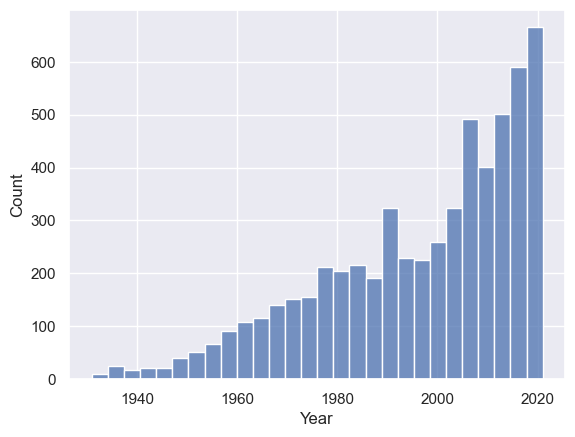

In [38]:
sns.histplot(x='Year',data=dataset)

d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


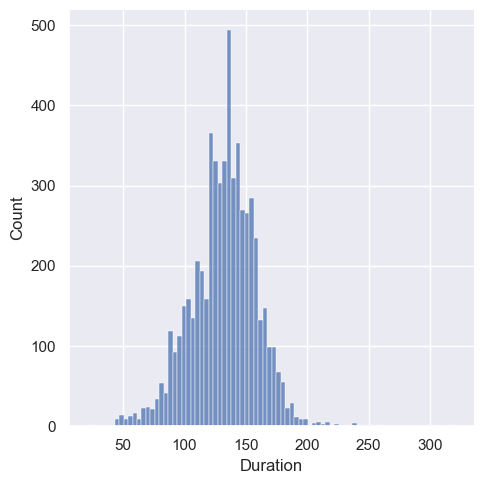

In [39]:
sns.displot(x="Duration",data=dataset)

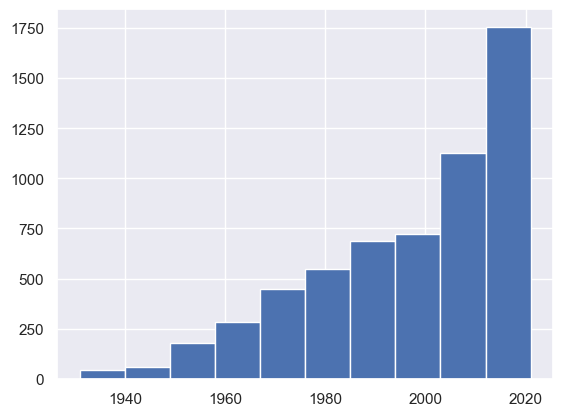

In [40]:
plt.hist(dataset['Year'])
plt.show()

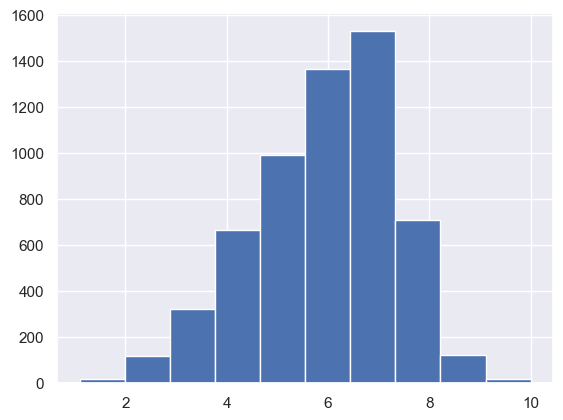

In [42]:
color = sns.color_palette('bright')
plt.hist(dataset['Rating'])
plt.show()

d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


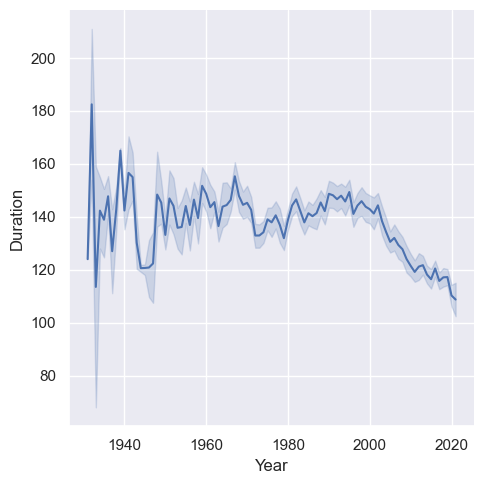

In [43]:
sns.relplot(x='Year', y='Duration', data=dataset, kind='line')

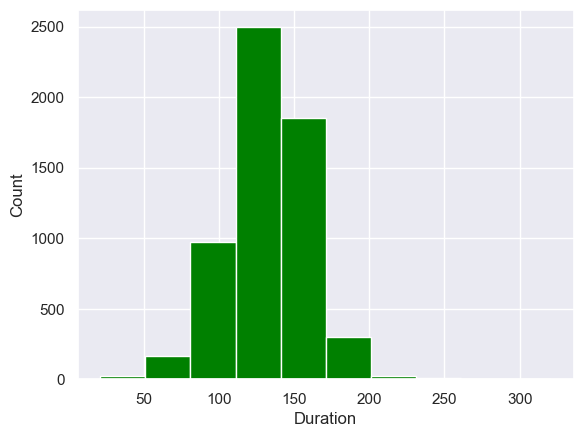

In [44]:
plt.xlabel('Duration')
plt.ylabel('Count')
plt.hist(x=dataset['Duration'], color='green')
plt.show()

In [45]:
dataset.isnull().sum()

Name        0
Year        0
Duration    0
Rating      0
Votes       0
Director    0
Actor 1     0
dtype: int64

# 3. Encoding Director and Actor 1 columns


In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
dataset

,Name,Year,Duration,Rating,Votes,Director,Actor 1
1,#Gadhvi (He thought he was Gandhi),2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal
3,#Yaaram,2019,110,4.4,35,Ovais Khan,Prateik
5,...Aur Pyaar Ho Gaya,1997,147,4.7,827,Rahul Rawail,Bobby Deol
6,...Yahaan,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill
8,?: A Question Mark,2012,82,5.6,326,Allyson Patel,Yash Dave
...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,6.1,408,Mozez Singh,Vicky Kaushal
15494,Zubeidaa,2001,153,6.2,1496,Shyam Benegal,Karisma Kapoor
15503,Zulm Ki Zanjeer,1989,125,5.8,44,S.P. Muthuraman,Chiranjeevi
15505,Zulmi,1999,129,4.5,655,Kuku Kohli,Akshay Kumar


## 1. Encoding Directors

In [48]:
dataset['Director'] = dataset['Director'].astype('category')

In [49]:
dataset['Director'].unique()

['Gaurav Bakshi', 'Ovais Khan', 'Rahul Rawail', 'Shoojit Sircar', 'Allyson Patel', ..., 'Prabhat Roy', 'Kajal Naskar', 'Tariq Bhat', 'Sumitra Bhave', 'Mozez Singh']
Length: 2549
Categories (2549, object): ['A. Bhimsingh', 'A. Jagannathan', 'A. Majid', 'A. Muthu', ..., 'Ziaullah Khan', 'Zoya Akhtar', 'Zubair Khan', 'Zunaid Memon']

In [50]:
dataset['Director'].nunique()

2549

In [51]:
dataset['Director'].str.strip()

1          Gaurav Bakshi
3             Ovais Khan
5           Rahul Rawail
6         Shoojit Sircar
8          Allyson Patel
              ...       
15493        Mozez Singh
15494      Shyam Benegal
15503    S.P. Muthuraman
15505         Kuku Kohli
15508       K.C. Bokadia
Name: Director, Length: 5851, dtype: object

In [52]:
#Encoding Director using Label Encoder

lab_enc=LabelEncoder()

In [53]:
lab_enc.fit(dataset['Director'])

LabelEncoder()

In [54]:
dataset['Director Encoded'] = lab_enc.transform(dataset['Director'])

In [55]:
director_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))
print(director_mapping)

{'A. Bhimsingh': 0, 'A. Jagannathan': 1, 'A. Majid': 2, 'A. Muthu': 3, 'A. Salaam': 4, 'A. Shamsheer': 5, 'A. Veerappan': 6, 'A.C. Trilogchander': 7, 'A.K. Bir': 8, 'A.L. Vijay': 9, 'A.M.R. Ramesh': 10, 'A.P. Nagarajan': 11, 'A.P. Subbaraav': 12, 'A.R. Murugadoss': 13, 'A.T. Joy': 14, 'A.T. Raghu': 15, 'Aadish Keluskar': 16, 'Aakkoo': 17, 'Aamir Bashir': 18, 'Aamir Khan': 19, 'Aamreeta Gautam': 20, 'Aanand L. Rai': 21, 'Aanand Raut': 22, 'Aarif Sheikh': 23, 'Aarti S. Bagdi': 24, 'Aarti Shrivastava': 25, 'Aarun Nagar': 26, 'Aaryaan Saxena': 27, 'Aashish Chanana': 28, 'Aatish Kapadia': 29, 'Aban Bharucha Deohans': 30, 'Abbas Alibhai Burmawalla': 31, 'Abbas Tyrewala': 32, 'Abdul Qayyoom Khan': 33, 'Abdul Rashid Kardar': 34, 'Abdul Sattar': 35, 'Abhay Chhabra': 36, 'Abhay Chopra': 37, 'Abhay Kumar': 38, 'Abhigyan Jha': 39, 'Abhijeet Kumar': 40, 'Abhijit Kokate': 41, 'Abhijit Panse': 42, 'Abhimanyu Chauhan': 43, 'Abhinav Kashyap': 44, 'Abhinav Shiv Tiwari': 45, 'Abhinav Thakur': 46, 'Abhina

## 2. Encoding Actors 1

In [56]:
dataset['Actor 1'] = dataset['Actor 1'].astype('category')

In [57]:
dataset['Actor 1'].unique()

['Rasika Dugal', 'Prateik', 'Bobby Deol', 'Jimmy Sheirgill', 'Yash Dave', ..., 'Mukesh Choudhary', 'Manoj Punj', 'Sadhana Singh', 'Sunil Sukthankar', 'Darsheel Safary']
Length: 2046
Categories (2046, object): ['A. Muthu', 'A. Nairang', 'A.K. Hangal', 'A.R.S.', ..., 'Zayed Khan', 'Zeenat Aman', 'Zenia Starr', 'Zulfi Sayed']

In [58]:
dataset['Actor 1'].nunique()

2046

In [59]:
dataset['Actor 1'].str.strip()

1           Rasika Dugal
3                Prateik
5             Bobby Deol
6        Jimmy Sheirgill
8              Yash Dave
              ...       
15493      Vicky Kaushal
15494     Karisma Kapoor
15503        Chiranjeevi
15505       Akshay Kumar
15508         Dharmendra
Name: Actor 1, Length: 5851, dtype: object

In [60]:
#Encoding the actor 1
actor_encoded = LabelEncoder()

In [61]:
actor_encoded.fit(dataset['Actor 1'])

LabelEncoder()

In [62]:
dataset['Actor Encoded'] = actor_encoded.transform(dataset['Actor 1'])

In [63]:
actor_mapping= dict(zip(actor_encoded.classes_,dataset['Actor Encoded']))
print(actor_mapping)

{'A. Muthu': 1418, 'A. Nairang': 1260, 'A.K. Hangal': 398, 'A.R.S.': 729, 'A.S. Ravindra Babu': 2019, 'Aachi Manorama': 316, 'Aadar Jain': 1420, 'Aadhi': 1197, 'Aadil Abedi': 679, 'Aadil Chahal': 717, 'Aahana Kumra': 166, 'Aakar Kaushik': 1144, 'Aakash': 610, 'Aalam': 1024, 'Aamir': 978, 'Aamir Bashir': 907, 'Aamir Khan': 1617, 'Aanchal Dwivedi': 1475, 'Aarti S. Bagdi': 1017, 'Aaryan': 1439, 'Aaryan Adhikari': 1871, 'Aashish Bhatt': 1372, 'Aashish Chaudhary': 1652, 'Aashish Kaul': 1942, 'Aasif Sheikh': 2040, 'Aatish Devgan': 199, 'Aayush Shah': 959, 'Aban Raza': 48, 'Abbas': 167, 'Abhay Chaudhary': 634, 'Abhay Deol': 301, 'Abhay Singhal': 258, 'Abhi Bhattacharya': 1364, 'Abhijeet K.': 679, 'Abhijeet Singh': 527, 'Abhilasha': 1311, 'Abhimanyu Dasani': 1082, 'Abhimanyyu Abhimanyu': 350, 'Abhishek': 398, 'Abhishek Bachchan': 1780, 'Abhishek Bharate': 1532, 'Abhishek Brahmachari': 1652, 'Abhishek Chitlangia': 1108, 'Abhishek Gupta': 797, 'Abhishek Kapoor': 16, 'Abhishek Patel': 86, 'Abhiya

In [64]:
print(dataset[['Actor 1','Actor Encoded']])

               Actor 1  Actor Encoded
1         Rasika Dugal           1418
3              Prateik           1260
5           Bobby Deol            398
6      Jimmy Sheirgill            729
8            Yash Dave           2019
...                ...            ...
15493    Vicky Kaushal           1944
15494   Karisma Kapoor            803
15503      Chiranjeevi            426
15505     Akshay Kumar            120
15508       Dharmendra            492

[5851 rows x 2 columns]


### Separating Features and Target Variable

In [65]:
# Features: ['Year','Votes','Rating', Director Encoded', 'Actor Encoded']
X= dataset.drop(columns=['Name','Duration','Director','Actor 1'], axis=1)
Y= dataset['Rating']


In [66]:
print(X)

       Year  Rating  Votes  Director Encoded  Actor Encoded
1      2019     7.0      8               660           1418
3      2019     4.4     35              1406           1260
5      1997     4.7    827              1605            398
6      2005     7.4   1086              2143            729
8      2012     5.6    326               144           2019
...     ...     ...    ...               ...            ...
15493  2015     6.1    408              1285           1944
15494  2001     6.2   1496              2158            803
15503  1989     5.8     44              1882            426
15505  1999     4.5    655              1074            120
15508  1998     6.2     20               941            492

[5851 rows x 5 columns]


In [67]:
print(Y)

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5851, dtype: float64


#### Splitting the dataset into training and testing data

In [68]:
X_train,X_test,Y_train, Y_test= train_test_split(X,Y, test_size= 0.2, random_state=2)

In [69]:
print(X.shape, X_train.shape, X_test.shape)

(5851, 5) (4680, 5) (1171, 5)


In [70]:
print(Y.shape, Y_train.shape, Y_test.shape)

(5851,) (4680,) (1171,)


 ### Training Model using Logistic Regression

In [71]:
linear_model = LR()

In [72]:
linear_model.fit(X_train,Y_train)

LinearRegression()

## Model Prediction and Evaluation

In [73]:
# Accuracy on training data
X_training_prediction = linear_model.predict(X_train)
print(X_training_prediction)

[3.8 4.  5.5 ... 7.1 5.2 7.2]


Since Rating is a continous variable and not a discrete variable, we use mean absolute error to calculate the accuracy of the model

In [74]:
from sklearn.metrics import mean_absolute_error
X_training_error = mean_absolute_error(Y_train, X_training_prediction)
print(X_training_error)

3.615592156154143e-13


In [75]:
training_model_score = linear_model.score(X_train, Y_train)
print(training_model_score)

1.0


We can observe that the accuracy of the training model is 100%. 

The Mean Absolute Error of training data is extremely low and its accuracy is high. We visualize this using a scatterplot.

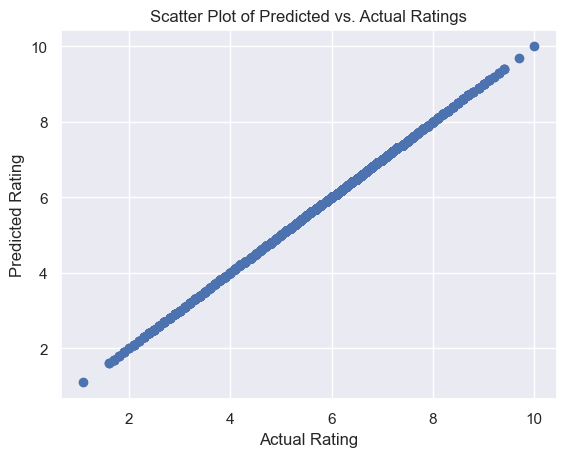

In [80]:
plt.scatter(x=Y_train, y=X_training_prediction)

# Add labels and title:
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Scatter Plot of Predicted vs. Actual Ratings')

# Display the plot:
# plt.grid(True)  
plt.show()

In [81]:
testing_predict = linear_model.predict(X_test)
print(testing_predict)

[7.9 5.6 6.7 ... 5.4 5.4 6.5]


In [82]:
X_testing_error = mean_absolute_error(Y_test,testing_predict)
print(X_testing_error)

3.530932070117548e-13


In [83]:
model_score = linear_model.score(X_test, Y_test)
print(model_score)

1.0


We can observe that the accuracy of the training model is 100%. 

We can visualize the Actual and predicted ratings of the testing model using the following scatter plot

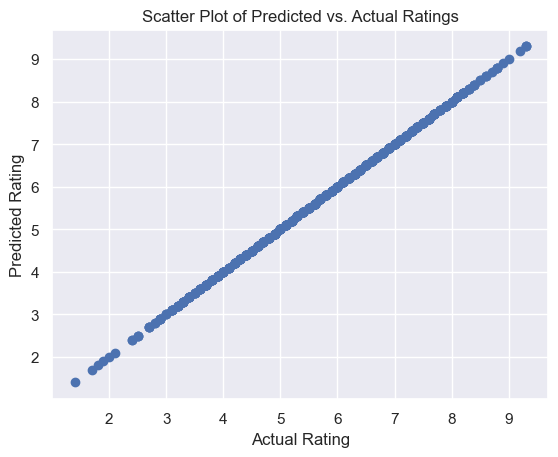

In [84]:
plt.scatter(x=Y_test, y=testing_predict)

# Add labels and title:
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Scatter Plot of Predicted vs. Actual Ratings')

# Display the plot:
plt.show()

The diagonal line on the scatter plot shows that Actual Rating and Predicted Ratings are very similar, therefore our model is accurate.